In [47]:
#%pylab inline
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import keras
import tensorflow as tf
from scipy.misc import imread
import warnings
warnings.filterwarnings('ignore')

In [63]:
train=pd.read_csv(r'D:\Analytics vidhya\datasets\keras\train.csv')
test=pd.read_csv(r'D:\Analytics vidhya\datasets\keras\test.csv')

In [37]:
train.head(1)

,filename,label
0,0.png,4


In [69]:
train.label.unique()

array([4, 9, 1, 7, 3, 2, 6, 0, 8, 5], dtype=int64)

In [38]:
test.head(1)

,filename
0,49000.png


In [39]:
seed=128
rng=np.random.RandomState(seed)

In [40]:
rng

In [41]:
import os
root_dir = os.path.abspath('D:\Analytics vidhya\datasets\keras')
#data_dir = os.path.join(root_dir, 'data')
#sub_dir = os.path.join(root_dir, 'sub')
# check for existence
os.path.exists(root_dir)
#os.path.exists(data_dir)
#os.path.exists(sub_dir)

True

In [42]:
os.getcwd()

'C:\\Users\\rameshsrujana\\PythonScripts\\ANALYTICS VIDHYA'

In [43]:
img_name=rng.choice(train.filename)
filepath=os.path.join(root_dir,'Images','train',img_name)
img=imread(filepath,flatten=True)

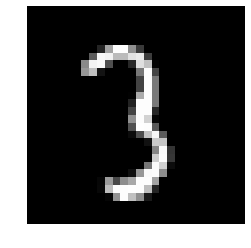

In [44]:
import matplotlib.pyplot as plt
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.show()

Populating the interactive namespace from numpy and matplotlib


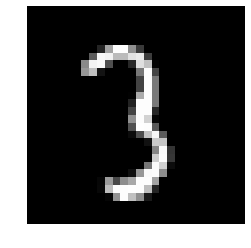

In [45]:
%pylab inline
pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [48]:
temp=[]
for img_name in train.filename:
    image_path=os.path.join(root_dir,'Images','train',img_name)
    img=imread(image_path,flatten=True)
    img=img.astype(float32)
    temp.append(img)
    
    

In [51]:
train_x=np.stack(temp)

In [53]:
train_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [54]:
train_x /= 255.0

In [55]:
train_x

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [56]:
train_x.shape

(49000, 28, 28)

In [57]:
train_x = train_x.reshape(-1, 784).astype('float32')

In [59]:
train_x.shape

(49000, 784)

In [64]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(root_dir, 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [65]:
test_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [67]:
train_y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
split_size = int(train_x.shape[0]*0.7)
split_size

34300

In [72]:
train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [73]:
train.label.ix[split_size:]

34300    3
34301    1
34302    6
34303    8
34304    3
34305    8
34306    8
34307    9
34308    3
34309    8
34310    4
34311    6
34312    6
34313    3
34314    6
34315    7
34316    5
34317    3
34318    0
34319    3
34320    9
34321    3
34322    8
34323    8
34324    7
34325    4
34326    3
34327    8
34328    6
34329    5
        ..
48970    7
48971    5
48972    0
48973    1
48974    4
48975    1
48976    7
48977    5
48978    6
48979    5
48980    6
48981    3
48982    5
48983    5
48984    9
48985    2
48986    9
48987    0
48988    0
48989    7
48990    0
48991    1
48992    1
48993    6
48994    9
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 14700, dtype: int64

In [89]:
# define vars
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# import keras modules

from keras.models import Sequential
from keras.layers import Dense

# create model
model = Sequential([
  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),
  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='sigmoid'),
])#used sigmoid instead of softmax



# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
tf.VERSION

'1.3.0'

In [90]:
trained_model = model.fit(train_x, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 4s 111us/step - loss: 0.6302 - acc: 0.8448 - val_loss: 0.3097 - val_acc: 0.9161
Epoch 2/5
34300/34300 [==============================] - 1s 29us/step - loss: 0.2667 - acc: 0.9266 - val_loss: 0.2510 - val_acc: 0.9316
Epoch 3/5
34300/34300 [==============================] - 1s 28us/step - loss: 0.2165 - acc: 0.9399 - val_loss: 0.2201 - val_acc: 0.9378
Epoch 4/5
34300/34300 [==============================] - 1s 30us/step - loss: 0.1845 - acc: 0.9484 - val_loss: 0.1949 - val_acc: 0.9456
Epoch 5/5
34300/34300 [==============================] - 1s 29us/step - loss: 0.1600 - acc: 0.9546 - val_loss: 0.1784 - val_acc: 0.9493


In [85]:
import tensorflow as tf

In [86]:
tf.VERSION

'1.3.0'

Prediction is:  4


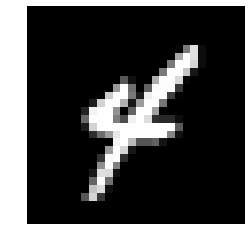

In [111]:
pred = model.predict_classes(test_x)

img_name = rng.choice(test.filename)
filepath = os.path.join(root_dir, 'Images', 'test', img_name)

img = imread(filepath, flatten=True)

test_index = int(img_name.split('.')[0]) - train.shape[0]

print ("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()


In [108]:
img1=rng.choice(test.filename)
test_index = int(img1.split('.')[0]) - train.shape[0]
img1

'57631.png'

In [98]:
test_index

9529

In [105]:
int(img1.split('.')[0])-train.shape[0]

9529

In [103]:
train.shape[0]

49000

In [104]:
img1.split('.')[0]

'58529'